In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [2]:
df_trans_seoul = pd.read_csv('../data/수정 후 데이터/seoul_stations.csv')
df_trans_seoul.drop(columns=['주소', '위도', '경도'], inplace=True)
df_trans_seoul.head()

,지하철역,호선명,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,1시이후 승차,1시이후 하차,총 이용객,유임승차인원,무임승차인원,유임하차인원,무임하차인원
0,가산디지털단지,1호선,1340.000000,6.133333,8205.400000,1980.583333,7914.766667,10941.750000,14763.350000,46802.533333,...,6686.566667,182.500000,1090.016667,0.700000,2.033333,1.180312e+06,418268.766667,29773.750000,497380.250000,32982.716667
1,개봉,1호선,1226.050000,8.633333,18414.966667,5494.800000,36569.333333,11855.966667,95251.200000,16530.883333,...,24220.900000,175.616667,3167.933333,0.300000,2.283333,1.524459e+06,514742.366667,145080.383333,511793.650000,150936.250000
2,광운대,1호선,1891.300000,9.366667,6056.233333,1672.750000,13794.750000,3227.133333,35362.750000,6220.833333,...,10462.150000,269.283333,5110.433333,0.333333,32.966667,7.115463e+05,209971.700000,50769.800000,198687.033333,50211.316667
3,구로,1호선,10105.066667,37.166667,24259.666667,4950.850000,20134.566667,12746.650000,39252.016667,32344.650000,...,15549.283333,109.766667,13847.733333,1.016667,73.483333,1.348324e+06,476611.116667,88107.983333,496615.200000,85082.766667
4,구일,1호선,255.433333,8.933333,3688.483333,1420.150000,9397.683333,3487.966667,27301.400000,7873.316667,...,6322.066667,71.650000,978.933333,0.100000,0.616667,6.326987e+05,176276.350000,36079.116667,182617.083333,35819.650000


## 1. 서울시 내의 지하철 환승유무

In [3]:
# 환승가능여부 컬럼 추가
df_trans_seoul['환승가능여부'] = ''
stations = df_trans_seoul['지하철역'].unique()

for i in stations:
    index = df_trans_seoul[df_trans_seoul['지하철역'] == i].index
    if len(df_trans_seoul[df_trans_seoul['지하철역'] == i]) > 1:
        for j in index:
            df_trans_seoul.iloc[j, -1] = 'Y'
    else:
        df_trans_seoul.iloc[index[0], -1] = 'N'

In [4]:
# 호선별 환승역의 수 확인
df_lines_trans = df_trans_seoul.groupby(['호선명','환승가능여부'])[['지하철역']].count()[:18]
df_lines_trans

지하철역
호선명 환승가능여부      
1호선 N         21
    Y         15
2호선 N         29
    Y         21
3호선 N         20
    Y         13
4호선 N         14
    Y         12
5호선 N         36
    Y         16
6호선 N         24
    Y         15
7호선 N         27
    Y         12
8호선 N          6
    Y          5
9호선 N         27
    Y         11

In [5]:
df_lines_trans.reset_index(inplace=True)

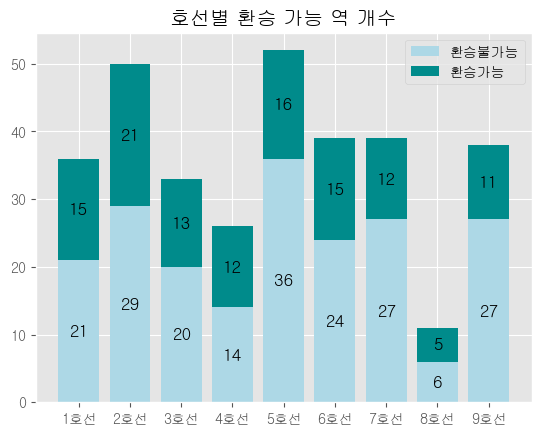

In [6]:
# 호선별 환승역/비환승역 개수 시각화
plt.style.use('ggplot')
df_lines_trans_y = df_lines_trans[ df_lines_trans['환승가능여부'] == 'Y' ]
df_lines_trans_n = df_lines_trans[ df_lines_trans['환승가능여부'] == 'N' ]
bar1 = plt.bar(df_lines_trans_y['호선명'], df_lines_trans_n['지하철역'], color='lightblue')
bar2 = plt.bar(df_lines_trans_n['호선명'], df_lines_trans_y['지하철역'], bottom=df_lines_trans_n['지하철역'], color='darkcyan')
plt.bar_label(bar1, size=12, label_type='center')
plt.bar_label(bar2, size=12, label_type='center')
plt.title('호선별 환승 가능 역 개수')
plt.legend(handles=(bar1,bar2), labels=('환승불가능','환승가능'), loc='upper right')
plt.show()

## 2. 서울시 내의 이용객 수 분석

In [7]:
# 이용객이 적은 역에 대한 분석용 데이터
df_seoul = df_trans_seoul.groupby(['지하철역', '환승가능여부'], group_keys=False).sum()
df_seoul.head(3)

C:\Users\user\AppData\Local\Temp\ipykernel_19688\3352544499.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_seoul = df_trans_seoul.groupby(['지하철역', '환승가능여부'], group_keys=False).sum()


,,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,1시이후 승차,1시이후 하차,총 이용객,유임승차인원,무임승차인원,유임하차인원,무임하차인원
지하철역,환승가능여부,,,,,,,,,,,,,,,,,,,,,
4.19민주묘지,N,6.596154,1.750000,1247.038462,256.711538,2867.442308,1003.576923,7135.115385,1607.961538,8178.480769,6655.538462,...,2349.923077,78.384615,482.750000,0.230769,5.250000,3.671792e+05,5.495531e+04,29204.692308,5.435063e+04,26730.942308
가락시장,Y,34.366667,1.066667,5271.683333,2893.800000,12025.533333,11336.716667,30956.550000,23363.300000,37710.700000,67904.966667,...,11662.750000,920.733333,4245.266667,4.866667,403.833333,1.401725e+06,3.636982e+05,123148.283333,3.885839e+05,122481.250000
가산디지털단지,Y,2003.850000,9.483333,15564.016667,7025.583333,16975.383333,32687.516667,34750.616667,152381.283333,36821.466667,541141.316667,...,13743.116667,1685.450000,3208.516667,3.533333,11.733333,3.644812e+06,1.477173e+06,105393.466667,1.554200e+06,104233.400000


In [8]:
df_seoul['환승호선'] = df_trans_seoul.groupby(['지하철역', '환승가능여부'], group_keys=False)[['호선명']].sum().values

In [9]:
# 총 이용객에 대한 오름차순 정렬
df_seoul.sort_values('총 이용객', inplace=True)

In [10]:
df_seoul.reset_index(inplace=True)
df_seoul.head(3)

,지하철역,환승가능여부,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,00시-01시 승차인원,00시-01시 하차인원,1시이후 승차,1시이후 하차,총 이용객,유임승차인원,무임승차인원,유임하차인원,무임하차인원,환승호선
0,둔촌오륜,N,0.513514,0.054054,171.324324,154.297297,728.837838,1493.567568,2762.459459,3117.567568,...,17.891892,109.081081,0.459459,5.243243,253996.864865,22110.72973,5096.297297,19689.945946,5098.648649,9호선
1,도림천,N,2.483333,0.066667,357.533333,337.316667,1105.483333,844.483333,2931.333333,4494.350000,...,24.500000,252.516667,0.650000,5.866667,271649.583333,27226.30000,6403.083333,29167.050000,6946.650000,2호선
2,신답,N,4.266667,0.533333,978.116667,133.366667,1683.666667,781.416667,6068.283333,982.600000,...,20.216667,392.566667,0.350000,4.033333,292209.000000,33166.80000,9469.966667,37443.100000,10222.633333,2호선


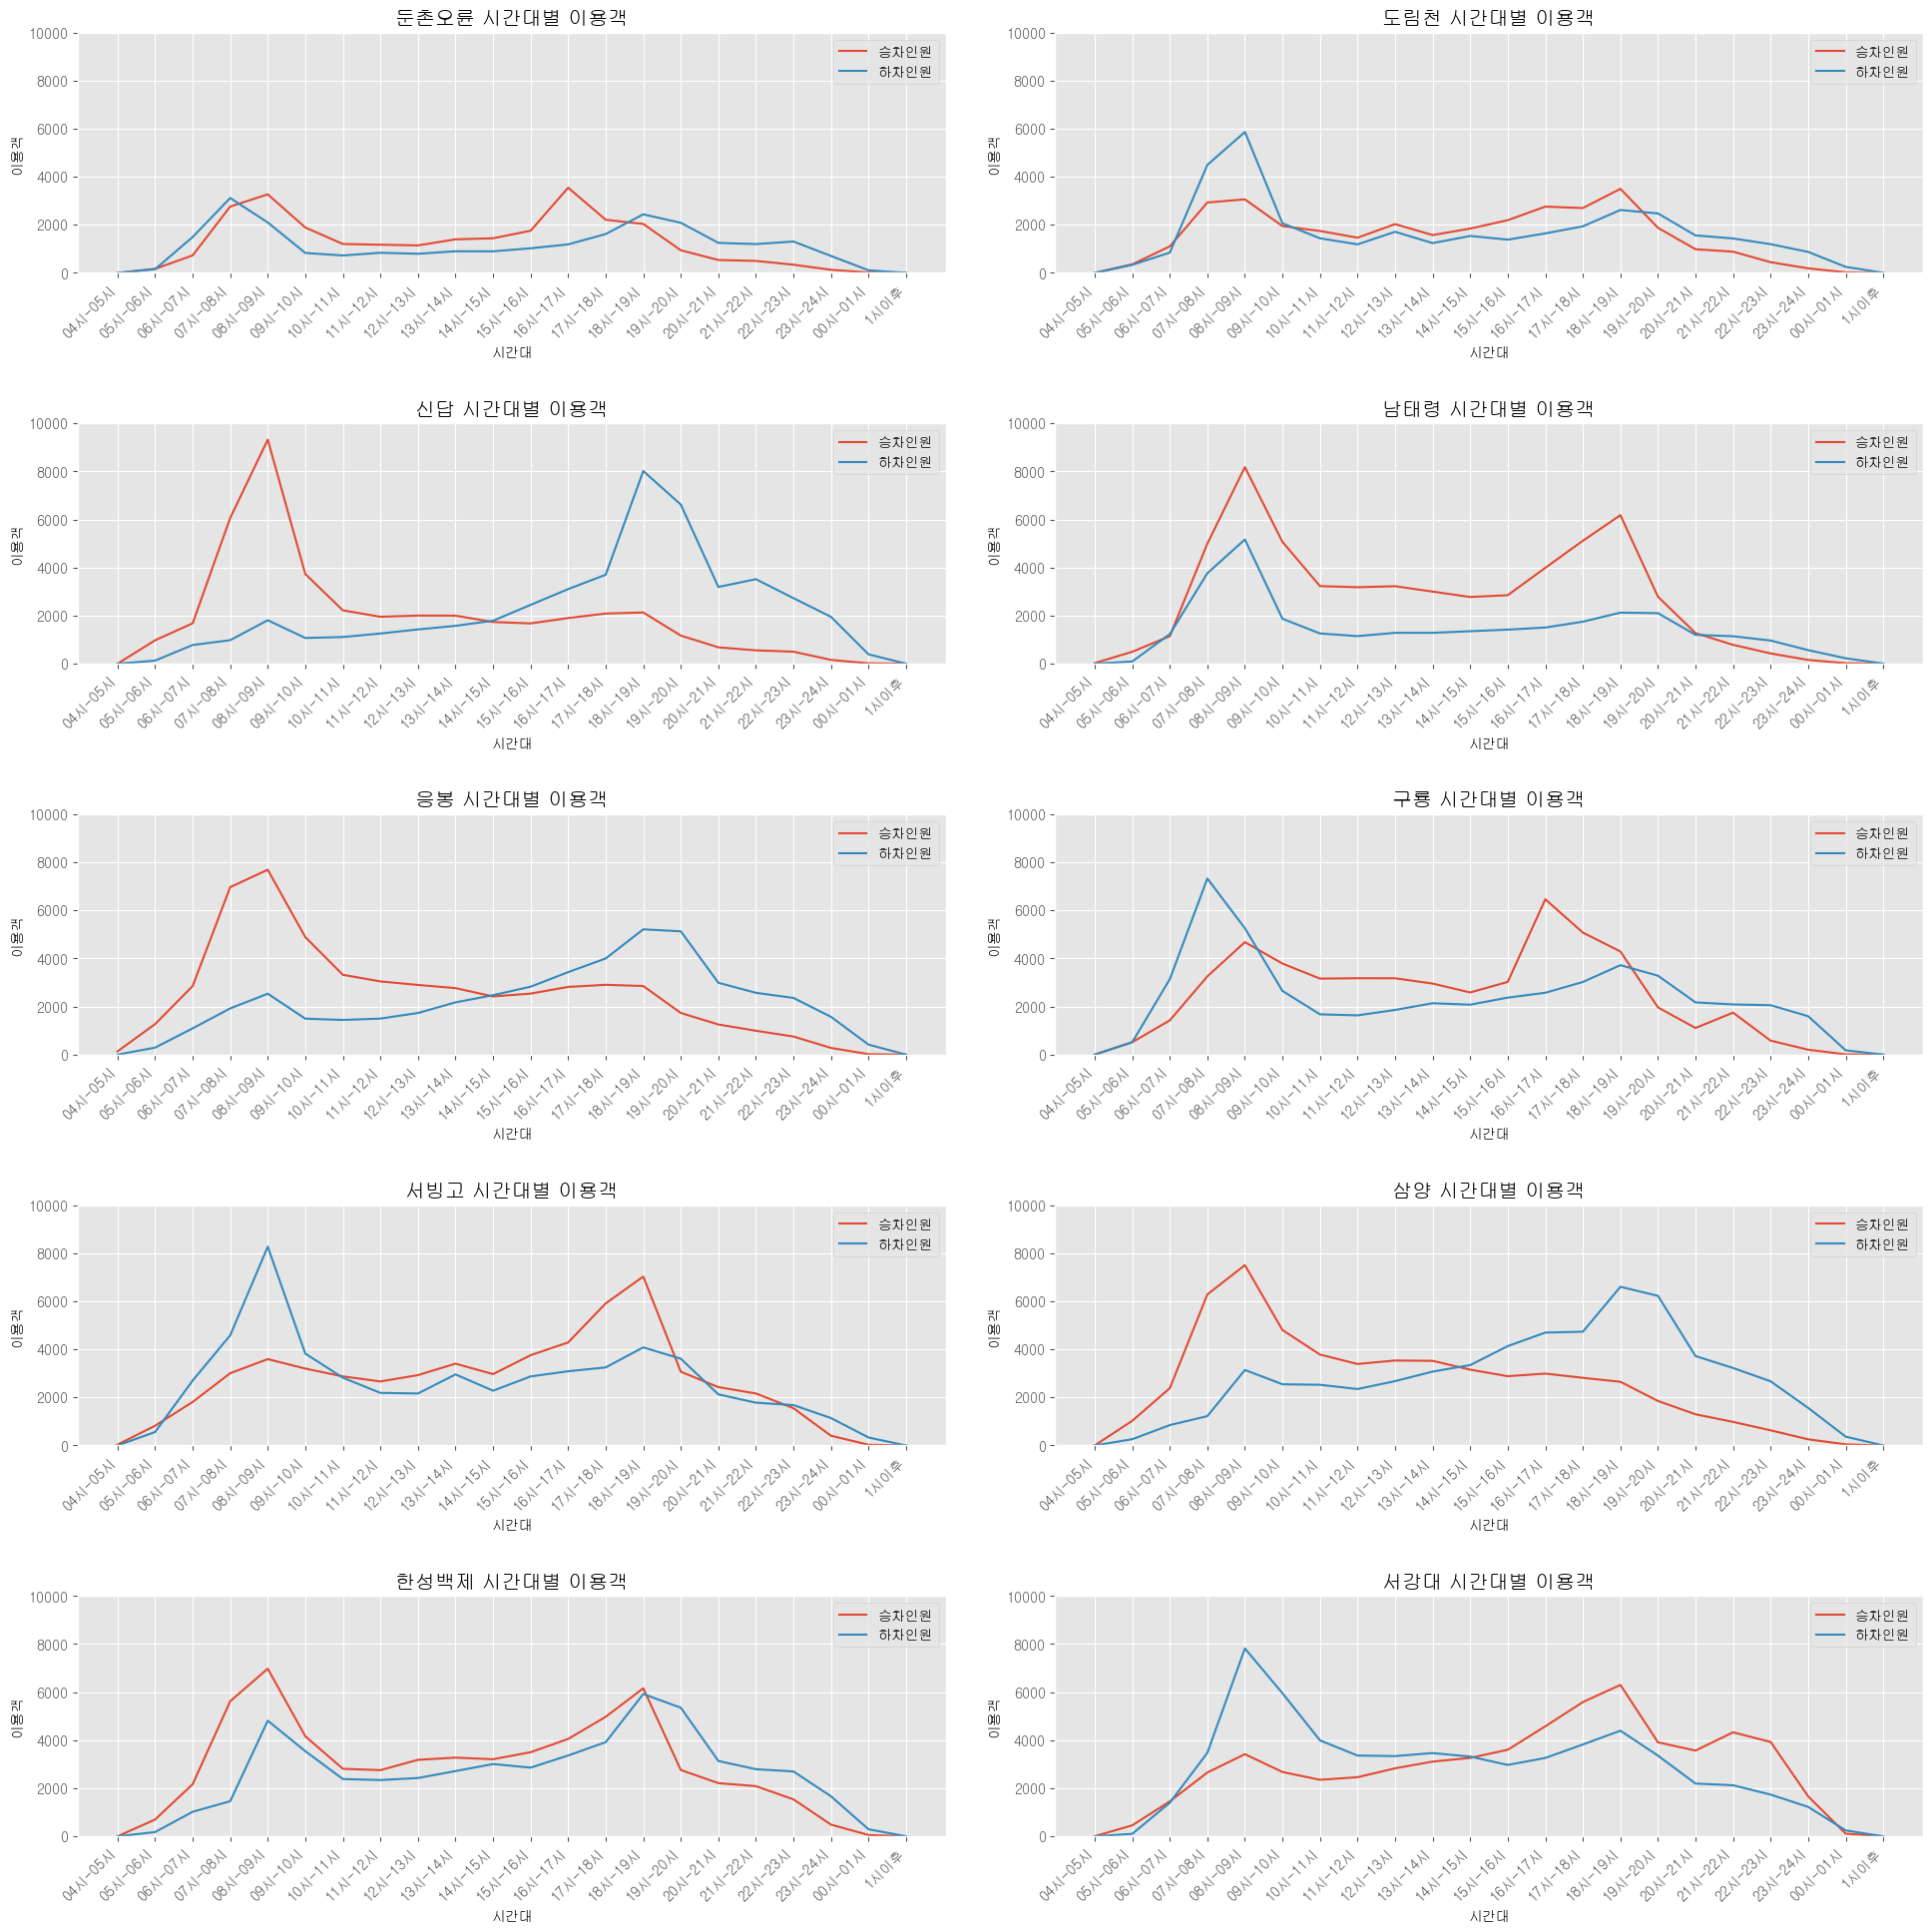

In [11]:
# 총 이용객 하위 10개 역 시간대별 이용객수
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,20))

for i in range(10):
    # 10개의 서브 플롯
    ax_i = fig.add_subplot(5, 2, i+1)
    # 승차 그래프
    ax_i.plot(df_seoul.loc[i].index[2:-6:2].str.split(' ').str[0], df_seoul.loc[i].values[2:-6:2], label="승차인원")
    # 하차 그래프
    ax_i.plot(df_seoul.loc[i].index[3:-6:2].str.split(' ').str[0], df_seoul.loc[i].values[3:-6:2], label="하차인원")
    
    ax_i.set_xlabel('시간대')
    ax_i.set_ylabel('이용객')
    ax_i.set_xticks(range(len(df_seoul.loc[i].index[2:-6:2].str.split(' ').str[0])))
    ax_i.set_xticklabels(df_seoul.loc[i].index[2:-6:2].str.split(' ').str[0], rotation=45, ha='right')
    ax_i.set_title(f'{df_seoul.loc[i].values[0]} 시간대별 이용객')
    ax_i.set_ylim(0, 10000)
    ax_i.grid(True)
    plt.legend()
    
plt.tight_layout(pad=3)
plt.show()

In [12]:
# 출/퇴근시간대 승/하차 컬럼추가
df_seoul['출근시간대 승차'] = df_seoul[['07시-08시 승차인원', '08시-09시 승차인원', '09시-10시 승차인원']].sum(axis=1)
df_seoul['출근시간대 하차'] = df_seoul[['07시-08시 하차인원', '08시-09시 하차인원', '09시-10시 하차인원']].sum(axis=1)

df_seoul['퇴근시간대 승차'] = df_seoul[['17시-18시 승차인원', '18시-19시 승차인원', '19시-20시 승차인원']].sum(axis=1)
df_seoul['퇴근시간대 하차'] = df_seoul[['17시-18시 하차인원', '18시-19시 하차인원', '19시-20시 하차인원']].sum(axis=1)

In [13]:
# 유임이용객, 무임이용객 수 컬럼 추가
df_seoul['유임이용객'] = df_seoul['유임승차인원'] + df_seoul['유임하차인원']
df_seoul['무임이용객'] = df_seoul['무임승차인원'] + df_seoul['무임하차인원']

In [14]:
df_seoul['총 이용객'] = df_seoul['유임이용객'] + df_seoul['무임이용객']
df_seoul['유임이용객 비율'] = round(df_seoul['유임이용객']/df_seoul['총 이용객'],3)
df_seoul['무임이용객 비율'] = round(df_seoul['무임이용객']/df_seoul['총 이용객'],3)

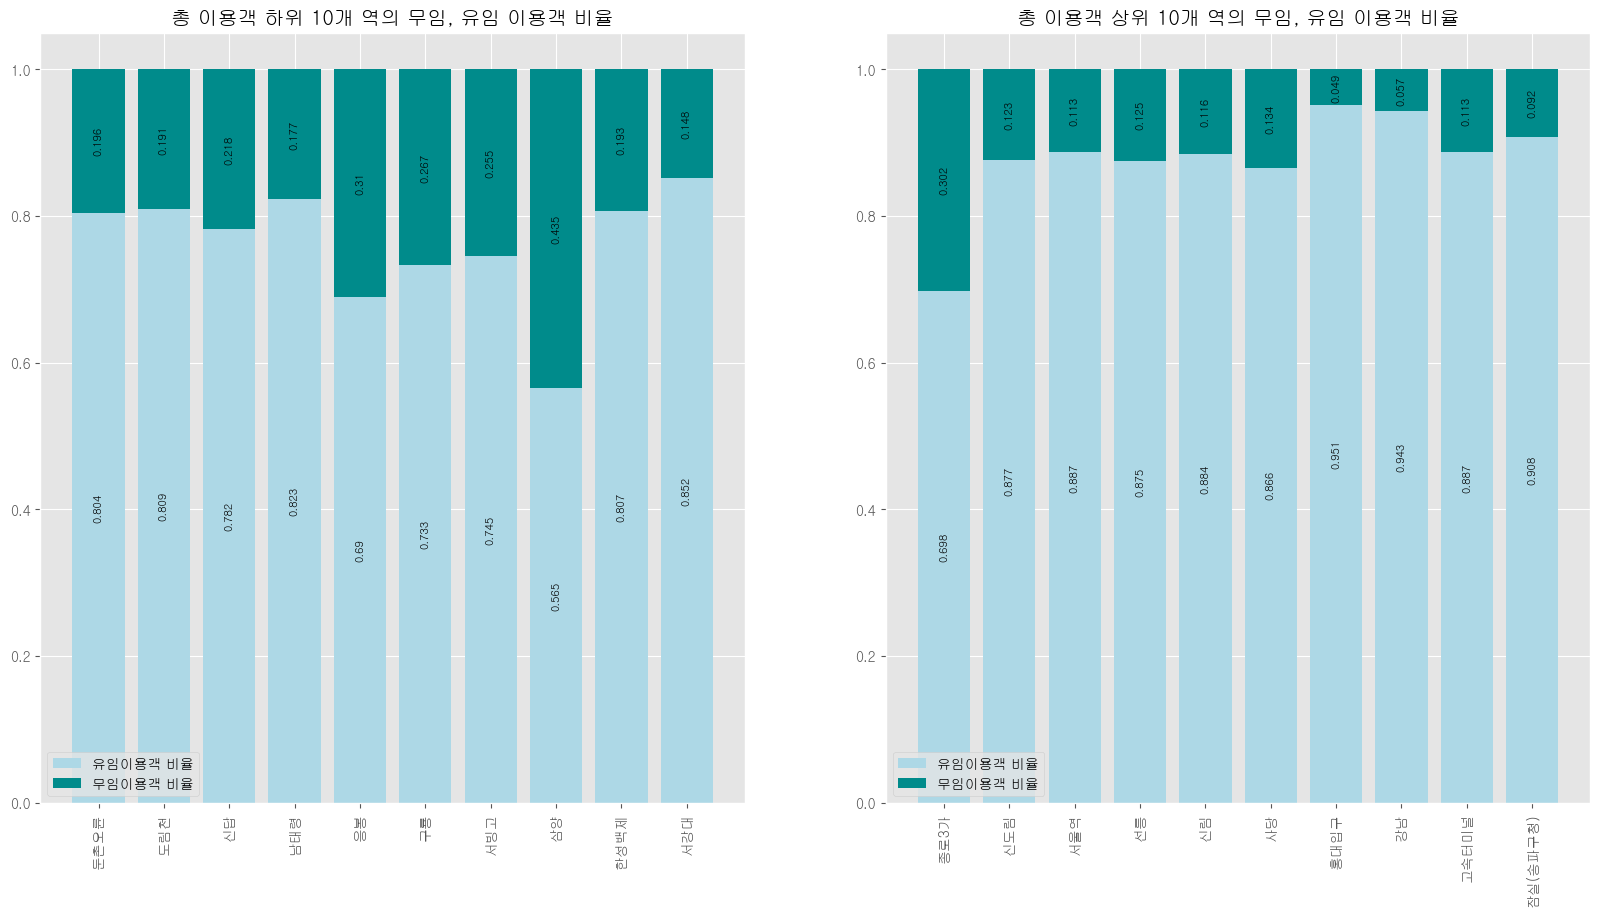

In [15]:
# 총 이용객 상위/하위 10개역의 유/무임 이용객 비율 시각화
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,2,1)
bar1=ax1.bar(df_seoul.head(10)['지하철역'], df_seoul.head(10)['유임이용객 비율'], color='lightblue')
bar2=ax1.bar(df_seoul.head(10)['지하철역'], df_seoul.head(10)['무임이용객 비율'], bottom=df_seoul.head(10)['유임이용객 비율'], color='darkcyan')
plt.title("총 이용객 하위 10개 역의 무임, 유임 이용객 비율")
plt.xticks(df_seoul.head(10)['지하철역'], rotation=90)
plt.bar_label(bar1, size=8, label_type='center', rotation=90)
plt.bar_label(bar2, size=8, label_type='center', rotation=90)
plt.legend(handles=(bar1,bar2), labels=('유임이용객 비율','무임이용객 비율'), loc='lower left')

ax2 = fig.add_subplot(1,2,2)
bar1=ax2.bar(df_seoul.tail(10)['지하철역'], df_seoul.tail(10)['유임이용객 비율'], color='lightblue')
bar2=ax2.bar(df_seoul.tail(10)['지하철역'], df_seoul.tail(10)['무임이용객 비율'], bottom=df_seoul.tail(10)['유임이용객 비율'], color='darkcyan')
plt.title("총 이용객 상위 10개 역의 무임, 유임 이용객 비율")
plt.xticks(df_seoul.tail(10)['지하철역'], rotation=90)
plt.bar_label(bar1,size=8, label_type='center', rotation=90)
plt.bar_label(bar2,size=8, label_type='center', rotation=90)
plt.legend(handles=(bar1,bar2), labels=('유임이용객 비율','무임이용객 비율'), loc='lower left')

plt.show()

In [16]:
# 총 이용객에 대해 정렬
df_seoul = df_seoul.sort_values('총 이용객', ascending=False).reset_index(drop=True)

In [17]:
# 상위 6개의 데이터 시각화
Index = df_seoul.head(6).index.values

In [18]:
df_top6 = df_seoul.loc[Index]

In [19]:
in_columns = df_top6.columns[[0,1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46]]
off_columns = df_top6.columns[[0,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,46]]

In [20]:
df_top6_in = df_top6[in_columns]
df_top6_off = df_top6[off_columns]

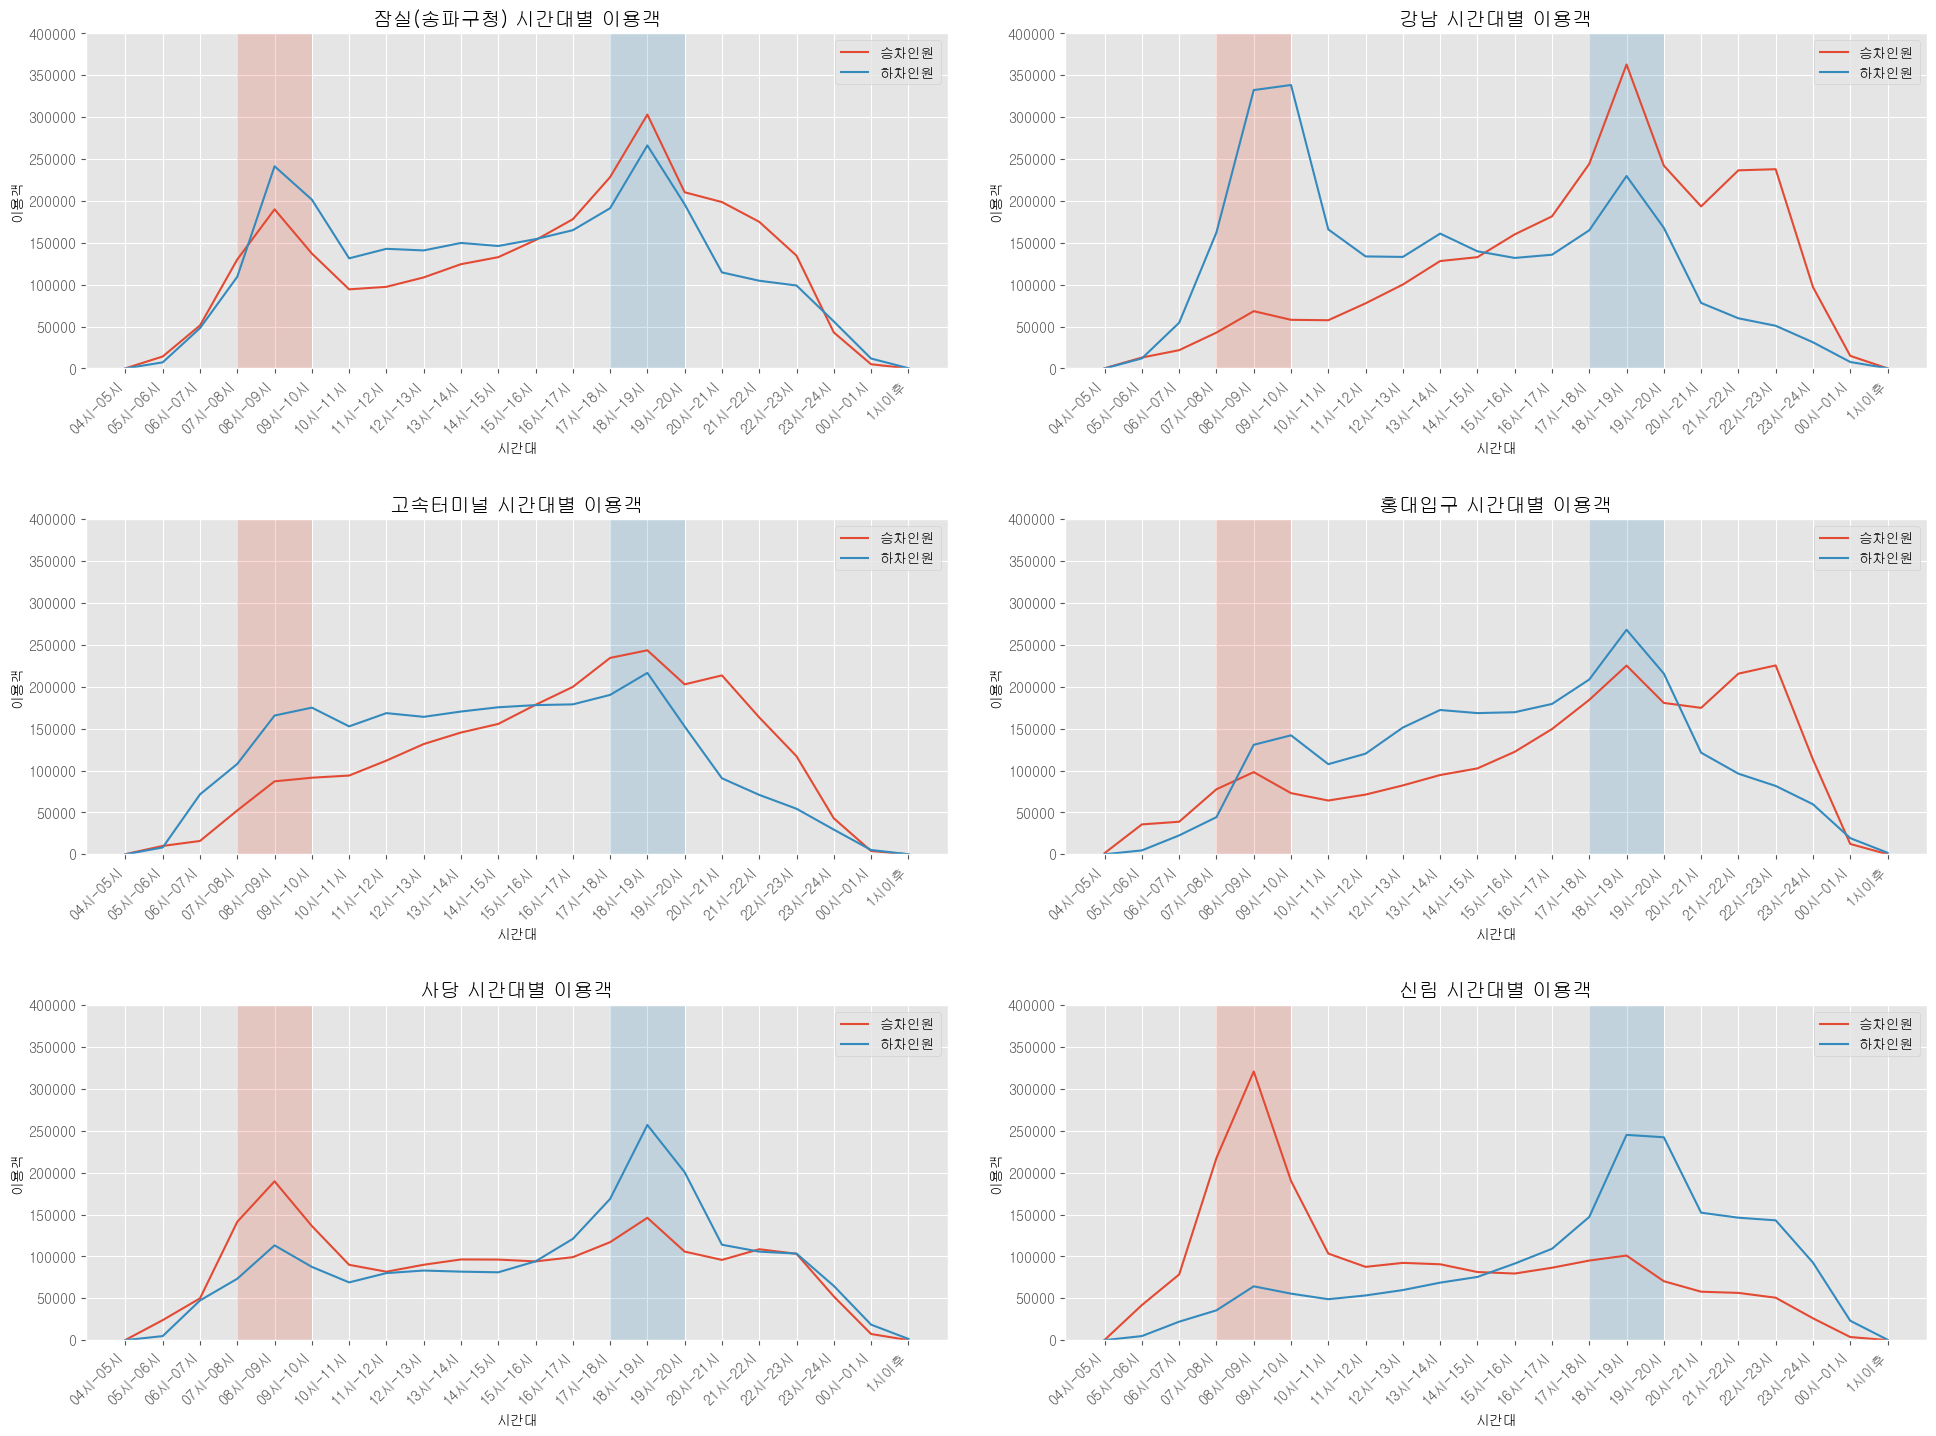

In [21]:
fig = plt.figure(figsize=(20,15))

for i in Index:
    # 6개의 서브 플롯
    ax_i = fig.add_subplot(3, 2, i+1)
    # 승차 그래프
    ax_i.plot(df_top6_in.loc[i].index[2:-1].str.split(' ').str[0], df_top6_in.loc[i].values[2:-1], label="승차인원")
    # 하차 그래프
    ax_i.plot(df_top6_off.loc[i].index[2:-1].str.split(' ').str[0], df_top6_off.loc[i].values[2:-1], label="하차인원")
    
    ax_i.set_xlabel('시간대')
    ax_i.set_ylabel('이용객')
    ax_i.set_xticks(range(len(df_top6_in.loc[i].index[2:-1].str.split(' ').str[0])))
    ax_i.set_xticklabels(df_top6_in.loc[i].index[2:-1].str.split(' ').str[0], rotation=45, ha='right')
    ax_i.set_title(f'{df_top6_in.loc[i].values[0]} 시간대별 이용객')
    ax_i.set_ylim(0, 400000)
    ax_i.axvspan(3, 5, facecolor='#e24a33', alpha=0.2)
    ax_i.axvspan(13, 15, facecolor='#348abd', alpha=0.2)
    ax_i.grid(True)
    plt.legend()
    
plt.tight_layout(pad=3)
plt.show()

In [22]:
# 하위 6개의 데이터 시각화
Index = df_seoul.tail(6).index.values

In [23]:
df_bottom6 = df_seoul.loc[Index]

In [24]:
df_bottom6_in = df_bottom6[in_columns]

In [25]:
df_bottom6_off = df_bottom6[off_columns]

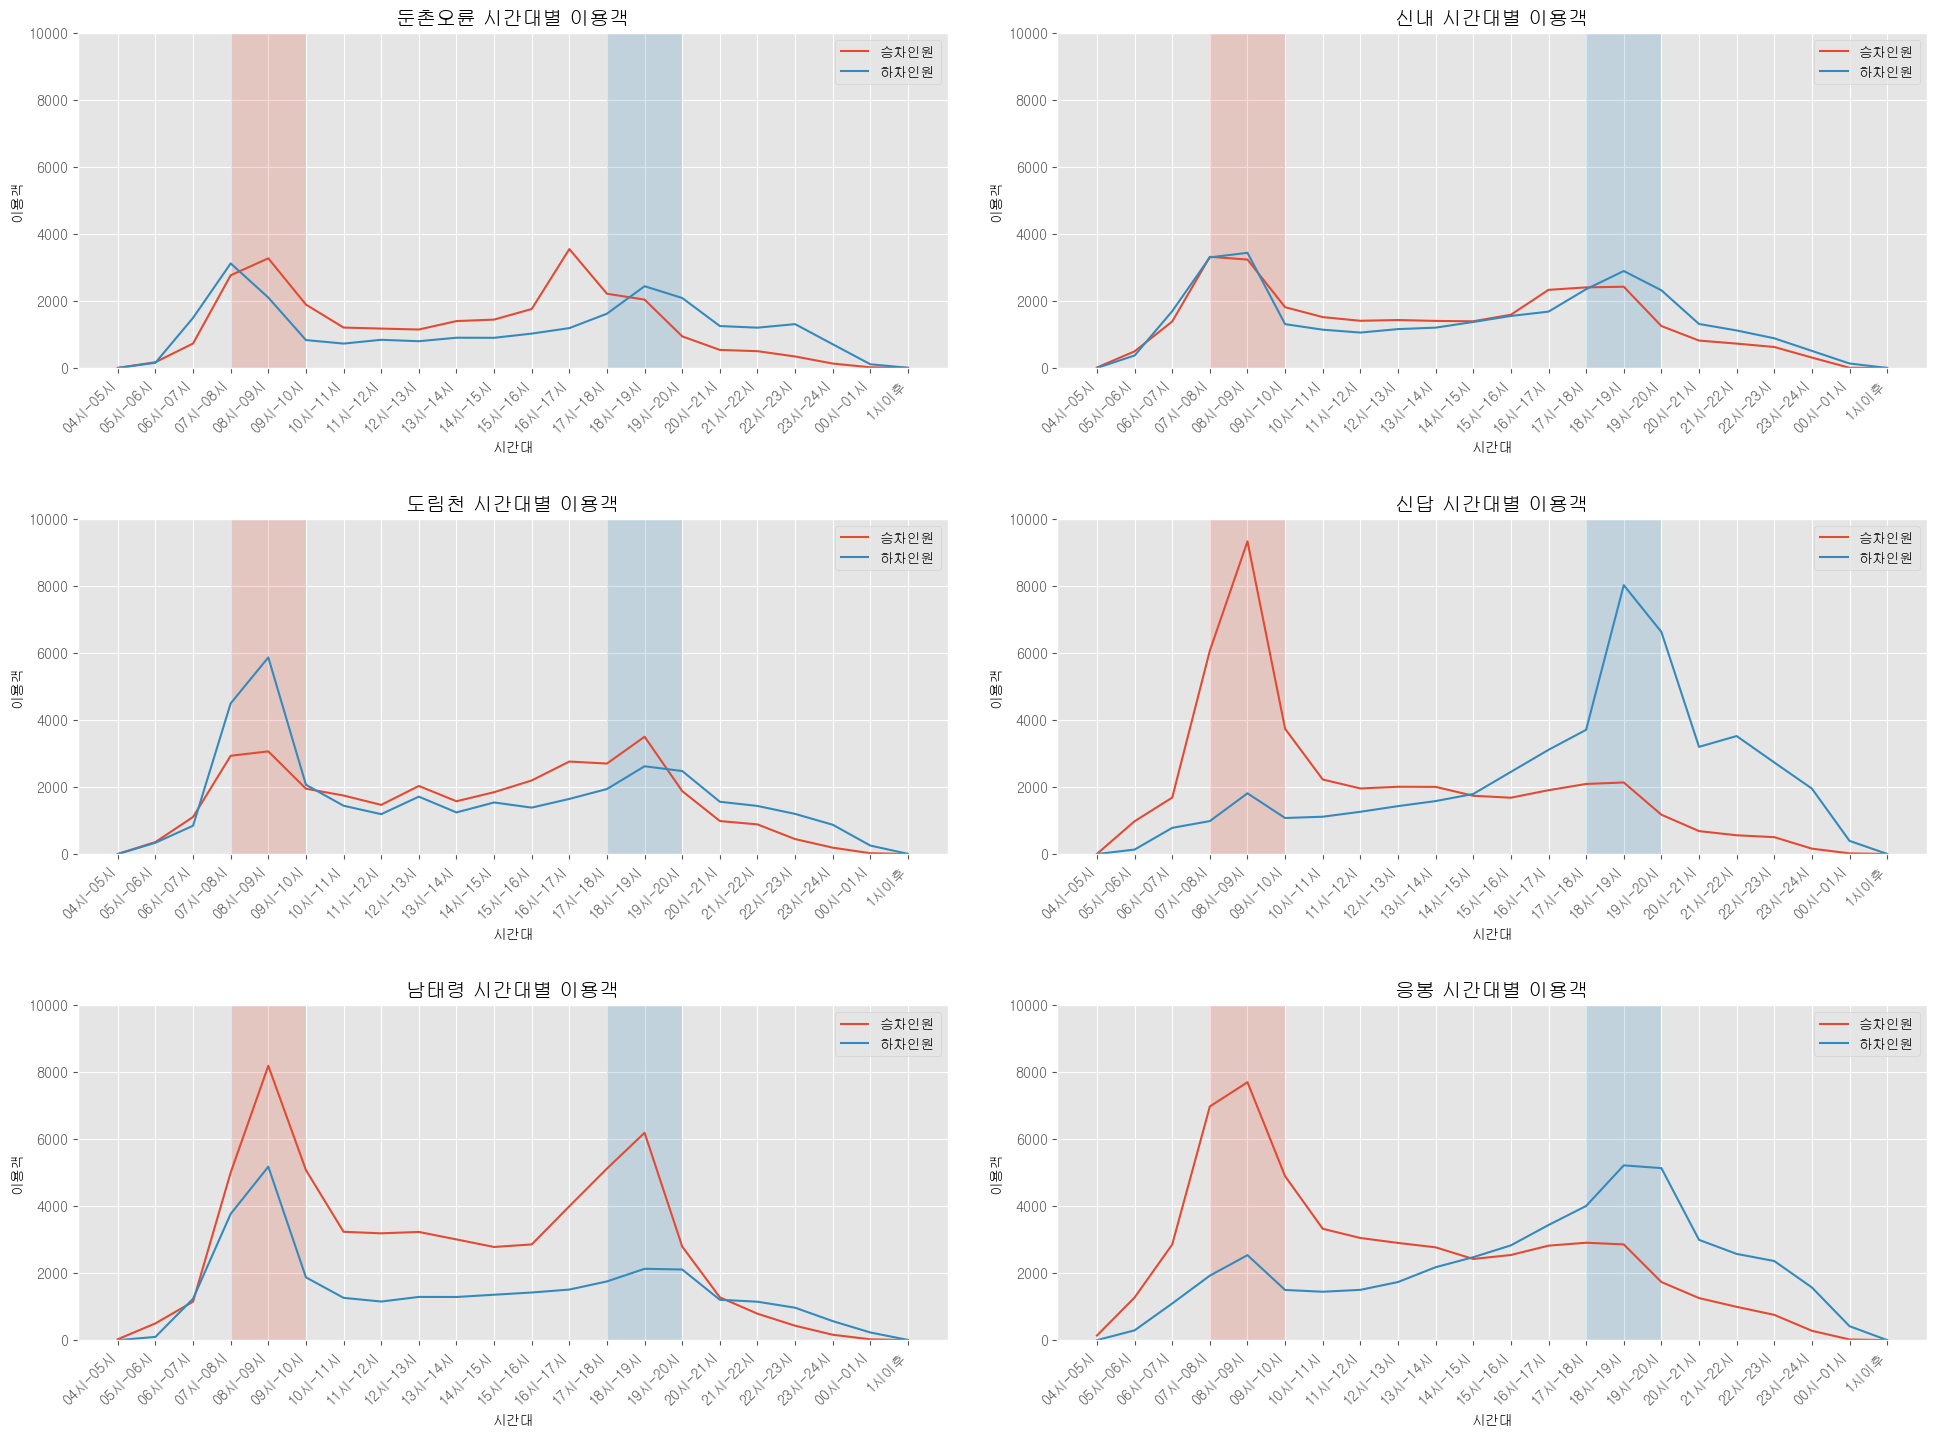

In [26]:
fig = plt.figure(figsize=(20,15))

for i in range(6):
    # 6개의 서브 플롯
    ax_i = fig.add_subplot(3, 2, i+1)
    # 승차 그래프
    ax_i.plot(df_bottom6_in.loc[295-i].index[2:-1].str.split(' ').str[0], df_bottom6_in.loc[295-i].values[2:-1], label="승차인원")
    # 하차 그래프
    ax_i.plot(df_bottom6_off.loc[295-i].index[2:-1].str.split(' ').str[0], df_bottom6_off.loc[295-i].values[2:-1], label="하차인원")
    
    ax_i.set_xlabel('시간대')
    ax_i.set_ylabel('이용객')
    ax_i.set_xticks(range(len(df_bottom6_in.loc[295-i].index[2:-1].str.split(' ').str[0])))
    ax_i.set_xticklabels(df_bottom6_in.loc[295-i].index[2:-1].str.split(' ').str[0], rotation=45, ha='right')
    ax_i.set_title(f'{df_bottom6_in.loc[295-i].values[0]} 시간대별 이용객')
    ax_i.set_ylim(0, 10000)
    ax_i.axvspan(3, 5, facecolor='#e24a33', alpha=0.2)
    ax_i.axvspan(13, 15, facecolor='#348abd', alpha=0.2)
    ax_i.grid(True)
    plt.legend()
    
plt.tight_layout(pad=3)
plt.show()

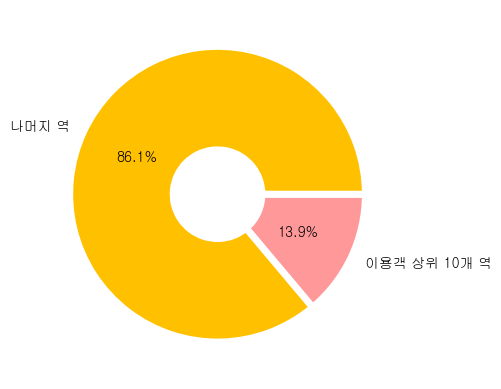

In [27]:
# 전체 이용객 대비 상위 10개 역의 이용객의 비율 시각화
top10 = df_seoul.head(10)['총 이용객'].sum()
total = df_seoul['총 이용객'].sum()
r = total - top10

plt.pie([top10,r], labels=['이용객 상위 10개 역','나머지 역'], colors=['#ff9999','#ffc000'], autopct='%.1f%%', 
        startangle=0, counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.show()

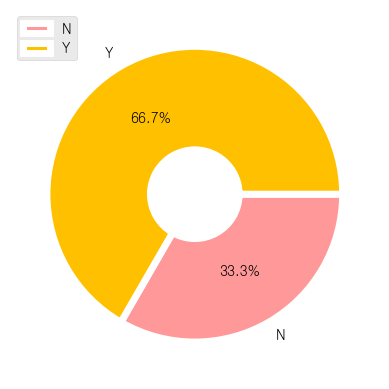

In [28]:
# 이용객 상위 30개 역의 환승역 비율
plt.pie(df_seoul.head(30).groupby('환승가능여부')[['환승가능여부']].count()['환승가능여부'], labels=df_seoul.head(30).groupby('환승가능여부')[['환승가능여부']].count().index, 
        autopct='%.1f%%', startangle=0, counterclock=False, colors=['#ff9999', '#ffc000'], wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.legend(loc='upper left')
plt.show()

In [30]:
# 필요한 컬럼만 추출
df_seoul = pd.concat([df_seoul[['지하철역', '환승가능여부']], df_seoul[df_seoul.columns[-8:]]], axis=1)
df_seoul.to_csv('../data/수정 후 데이터/출퇴근 시간대 승하차.csv', index=False)